# Probabilidad
Suponiendo que lanzamos un dado:
+ **Espacio muestral**: Conjunto de todas las posibilidades {1,2,3,4,5,6}
+ **Suceso elemental**: Cada elemento del espacio muestra {1},{2},...,{6}
+ **Suceso compuesto**: Conjunto de sucesos elementales ej, obtener numero par, impar o mayor a 4
+ **Suceso seguro**: Siempre ocurre {1,2,3,4,5,6}
+ **Suceso Imposible**: Obtener un numero < 0 o > 6
+ **Suceso complementario a un suceso A**: por ejemplo si el suceso son los numeros pares, el complementario son impoares

Los sucesos pueden ser operados como conjuntos, con interseccion, union o diferencia

**Probabilidad clásca (regla de Laplace)** suponiendo un experimento con sucesos equiprobables, tenemos que la probabilidad de A es el numero de casos favorables / el numero de casos posibles.

**Enfoque frecuentista** si repetimos un experimento muchas veces, la frecunacia relativa convergeria con la probabilidad

**Probabilidad subjetiva** Depende de la informacion que poseamos

P(AUB) = P(A)+P(B) - P(A∩B)

### Probabilidad Condicionadas 
Ejemplo: tenemos un grupo de 100 ejecutivos y el registro de su peso y el hecho de si sufren hipertension o no.

Vamos a calcular la probabilidad de que al seleccionar uno, sea hipertenso


In [1]:
import pandas as pd

In [3]:
Tension = ["Hipertenso(H)", "Normal(N)"]
Insuficiente = [2,20]
Normal = [8,45]
Sobrepeso = [10,15]
HiperTension = pd.DataFrame({"Tension": Tension, "Insuficiente": Insuficiente, "Normal": Normal, "Sobrepeso": Sobrepeso})
HiperTension["Total"] = HiperTension[["Insuficiente", "Normal", "Sobrepeso"]].sum(axis=1)
recuento = HiperTension[["Insuficiente", "Normal", "Sobrepeso", "Total"]].sum(axis=0)
HiperTension = HiperTension.append({"Tension" : "Total", "Insuficiente" : recuento[0], "Normal" : recuento[1], "Sobrepeso": recuento[2], "Total": recuento[3]}, ignore_index = True)
HiperTension.set_index("Tension", inplace = True)
HiperTension

,Insuficiente,Normal,Sobrepeso,Total
Tension,,,,
Hipertenso(H),2,8,10,20
Normal(N),20,45,15,80
Total,22,53,25,100


In [6]:
HiperTension["Total"]["Hipertenso(H)"]/HiperTension["Total"]["Total"]

0.2

Suponiendo que tiene sobrepeso, ¿Cual es la probabilidad de que sea hipertenso?

In [7]:
HiperTension["Sobrepeso"]["Hipertenso(H)"]/HiperTension["Sobrepeso"]["Total"]

0.4

#### Sucesos independientes
Al saber si uno ocurrio no nos da informacion de que el otro haya ocurrido, son independientes si:
P(AnB) = P(A) * P(B)
Ejemplo: 
Lanzando un dado 
+ A: El resultado es par
+ B: El resultado es mayor que 2

P(A|B) = P(AnB)/P(B) = (2/6)/(4/6) = 1/2 = P(A)

---

### Probabilidad Total
Los sucesos son excluyentes si sus intersecciones son el conjunto vacio 

Si ademas la union de estos es el espacio muestral entonces son una partición del espacio muestral

Y ahora si tenemos un suceso A como la siguiente imagen
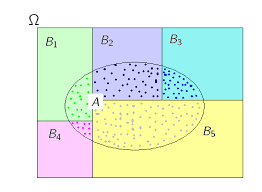

P(A) = P(AnB1) + P(AnB2) + ... + P(AnBk)

= P(A|B1)P(B1) + P(A|B2)P(B2) + ... + P(A|Bk)P(Bk)

Ejemplo
En una fabrica se embalan galletas en cuatro cadenas de montaje: A1, A2, A3 y A4. El 35% de la produccion se embala en la cadena A1, el 20%, 24% y 21% en A2,A3,A4.
Los datos indican que no se embalan un porcentaje pequeño de las cajas: 1% para la cadena A1, 3% en A2, 2.5% en A3 y 2% en A4
¿Cual es la probabilidad de que una caja elegida al azar sea defectuosa?

In [9]:
Defectuoso = .35*.01 + .2*.03 + .24 * .025 + .21 * .02
Defectuoso

0.0197

### Teorema de Bayes
para 2 sucesos A y B con P(A) > 0 y P(B) > 0 se tiene que:

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

P(AnB) = P(B|A)P(A) = P(A|B)P(B)

Continuando con el ejemplo, suponiendo que se agarra una caja defectuosa ¿Cual es la probabilidad de que haya sido embalada en la cadena A1?
P(A1|Defectuosa) = P(Defectuosa|A1) * P(A1) / P(Defectuosa) = .35 * .01 / .0197

In [10]:
.35 * .01 / .0197

0.17766497461928935

Dada una particion B1,B2, ... , Bk, con P(Bi) != 0, i = 1,...,k y dado un suceso A, se tiene que para j = 1,...k
$P(B|A) = \frac{P(A|Bj)P(Bj)}{P(A|B1)P(B1) + P(A|B2)P(B2)+...+P(A|Bk)P(Bk)}$

Ejemplo:
Se tiene un test para una enfermedad que afecta a 1 de cada 10'000 personas. El testa da positivo en 99 de cada 100 personas que la padecen y da negativo en 97 de cada 100 personas que no la padecen. Si se aplica a una persona y da positivo ¿ Cual es la probabilidad de que padezca la enfermedad?

P(Enfermo| Dio positivo) = P(Dio Positivo| Enfermo) P (Enfermo) / P(Dar positivo)

P(Dio Positivo| Enfermo) P (Enfermo)  = .99 * 1/10000

P(Dar positivo) = .99 * 1/10000 + .03 * 9999/10000

In [12]:
(.99 / 10000 )/(.99 / 10000 + .03 * 9999/10000)

0.0032894736842105266

# Ejercicios
#### Ejercicio 1 
Sabiendo que $P(AnB) = .6$ y $P(An\overline{B}) = 0.2$
Calcular la probabilidad de A

(AnB) U (AnB') = P(AnB) + P(AnB') - P((AuB)n(AnB'))

In [14]:
AyB = .6 
AyNoB = .2
AyB + AyNoB

0.8

#### Ejercicio 2
Sea la urna U con bolas, 2 blancas, 3 negras y 4 rojas, se extraen 3 bolas, 1 negra, la segunda no se ve y la tercera blanca. Cual es la probabilidad de que la segunda sea roja

tras la primera extraccion tenemos:
+ U(2B,2N,4R)

tras la segunda pudieron ser:
+ U1(1B,2N,4R)
+ U2(2B,1N,4R)
+ U3(2B,2N,3R)

y ahora, cual es la probabilidad de U3 dado que sabemos que la 3ra fue blanca
+ P(U1) = 2/8
+ P(U2) = 2/8
+ P(U3) = 1/2
+ P(U3|B) = P(B|U3)* P(U3) / P(B)
+ P(B|U3) = 2/7
+ P(B) = 1/7* 1/4 + 2/7 * 1 / 4 + 2/7 * 1 / 2

In [19]:
(2 / 7 ) * (1 / 2) / (((1 / 7) * (1 / 4)) + ((2 / 7) * (1 / 4))  + ((2/7) * (1/2)))

0.5714285714285714

#### Ejercicio 3 
se tiene el siguiente circuito conectado: 
![Conectado](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlv3XAUnC7laFHQELMW-f3aMvosoifIH99WA&usqp=CAU)
hay un .01 de que un componente se averie, cual es la probabilidad de que haya una ruta que llegue de A y B  

Existen 3 rutas:
+ 1, 2, 3 
+ 1, 4, 5, 6
+ 1, 4, 5, 7

En 6 y 7 deja de funcionar cuando ambos fallan, asi que necesitamos la probabilidad de que los 2 fallen, .01 * .01

Estando conectados en serio 4-5-(6,7) aqui hay error si alguno de los 3 falla, por lo que aqui necesitamos la probabilidad de que ninguno falle. En este caso .99*.99*(1-.01*.01). Y lo mismo para 2 y 3 donde la probabilidad de que ninguno falle es de .99 * .99

In [3]:
.99*.99*(1-.01*.01)

0.98000199

In [4]:
.99 * .99

0.9801

(2, 3) esta en paralelo con (4,5,(6,7)) por lo que aqui necesitamos la probabilidad de que los 2 fallen es decir 1-.9801 * 1-.98000199

In [13]:
1 - ((1-.99*.99*(1-.01*.01)) * (1- .99 * .99))

0.999602039601

Y con el 1 en serie solo nos queda multiplicar la probabilidad de que nada falle, .99 * .99960

In [14]:
(1 - ((1-.99*.99*(1-.01*.01)) * (1- .99 * .99))) * .99

0.98960601920499